# Homework 1 (HW1)

---
By the end of this homework we expect you to be able to:
1. Load data from different formats using [pandas](https://pandas.pydata.org/);
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy data sets;
4. Aggregate your data in different (and hopefully helpful) ways; 
5. Create meaningful visualizations to analyze the data;
6. Critically think and write about data;
---

## Important Dates

- Homework release: Fri 8 Oct 2021
- **Homework due**: Fri 22 Oct 2021, 23:59
- Grade release: Fri 29 Oct 2021

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended,
 you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be 
**strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

In this project, we are going to analyze data from an experiment about *honesty*. 
Oftentimes, we are asked to confirm our honest intentions by signing **at the end** of a document. 
For example, in tax returns or insurance policy forms, we are often asked to sign our names under a text that reads 
something like "I hereby certify that the above statements are true and correct to the best of my knowledge."

However, when individuals sign **after** lying in the form, they may not feel the need to correct the falsehoods they 
have reported. In that context, it could be that signing at **the beginning** rather than at the end of the document 
would decrease dishonesty, as those who are filling the form would be aware of the ethical requirements *before* they 
provide the information in the form.

This intuition has led researchers to partner up with a motorcycle insurance company to run a randomized experiment. 
In this insurance company (as well as in many others), customers had to report the exact *odometer kilometrage*¹ in 
order for the company to adjust the insurance premiums. Note that motorcycles with lower kilometrage are less likely to 
have issues, and thus will result in a lower *insurance premium*². Therefore, customers have an incentive to lie, 
reporting a kilometrage lower than the real value, in order to save money.

In the experiment, two different forms were created: one where the signing was done at the end, and another where the 
signing was done at the beginning. The insurance company then randomized these forms (i.e., each customer received
 exactly one form, each with probability 50%) and sent back the data that customers had provided. Some noteworthy 
 details on the experiment are that:

- All customers involved in the experiment already had a contract with the company and were simply renewing it. 
In the data that the company provided, they also report the odometer kilometrage for their previous contract.
Each policy, therefore, contains two contracts: the "updated" contract —where the experiment was conducted— and 
the "baseline" contract, which was the previous contract customers had with the company.
- A single insurance policy can insure up to 4 distinct motorcycles.

In this assignment, you will take the role of the researcher and work analyzing this data!

*Glossary:*
1. **odometer kilometrage:** the total distance the motorcycle has traveled.
2. **insurance premiums:** the amount of money one pays for an insurance policy.

---

## The data

The company provided you with a compressed `.tsv` file containing one row per policy. 
The `.tsv` has the following fields:

- `condition`: either `Sign Top` or `Sign Bottom`, depending on which form was sent.
- `id`: unique identifier for each insurance policy.
- `motorcycle_count`: number of motorcycles covered by the insurance policy.
- `baseline_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *previous (baseline)* contract. 
- `update_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *current (updated)* contract.

Some comments:

- Recall that a single policy can ensure up to 4 motorcycles, and thus, the suffixes [1-4] indicate that there are 4 
versions of these columns in the data (e.g., `baseline_motorcycle1`, `baseline_motorcycle2`, `baseline_motorcycle3`, 
`baseline_motorcycle4`). 
- When a policy has fewer than 4 motorcycles, only the columns with the smaller numerals are filled (e.g., if a policy 
insures one motorcycle,  only `baseline_motorcycle1` and `update_motorcycle1` will be filled).
- Note that we only have access to the odometer kilometrage reported by the customers, 
which may be different from the real kilometrage of the motorcycles.

In [1]:
# Imports you may need
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import scipy.stats as stats
from itertools import product
import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None  # default='warn'

### **Task 1** — 4pts

Your first task is to load the dataset into memory using pandas. 
**You should load the data directly from the compressed files.**

Here, the files at hand are rather small, and you could easily uncompress the files to disk and work with them as plain 
text. Why, then, are we asking you to load the files compressed? The reason is that, in your life as a data scientist, 
this will often not be the case. Then, working with compressed files is key so that you don't receive email from your 
(often more responsible) colleagues demanding to know how you have managed to fill the entire cluster with your 
datasets. Another big advantage of compressing files is to simply read files faster. You will often find that reading
compressed data on the fly (uncompressing it as you go), is much faster than reading uncompressed data, since reading
and writing to disk may be your [bottleneck](https://skipperkongen.dk/2012/02/28/uncompressed-versus-compressed-read/). 

---

**Hint:** `pandas` can open compressed files.

**Hint:** In the real world (and in ADA-homework), your file often comes with some weird lines! 
This time you can safely ignore them (but in the real world you must try to understand why they are there!). 
Check the `error_bad_lines` or the `on_bad_lines` (depending on your pandas version) parameter on `read_csv`.

In [2]:
df = pd.read_csv('data/data.tsv.gz', compression='gzip', sep='\t', on_bad_lines='skip')
df

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
13492,Sign Top,13484,20970,61552,42391.0,46815.0,NaN,NaN,NaN,NaN,2
13493,Sign Top,13485,22606,56382,NaN,NaN,NaN,NaN,467.0,27441.0,2
13494,Sign Bottom,13486,30700,32916,89680.0,139570.0,NaN,NaN,NaN,NaN,2
13495,Sign Top,13487,29884,35459,NaN,NaN,NaN,NaN,NaN,NaN,1


### **Task 2** — 12pts

As a good data scientist, the first thing you do is to clean up the data and perform some small sanity checks.

1. The motorcycle insurance company mentioned that each policy has a unique identifier, but that there may be duplicate 
rows (i.e., multiple rows with the same policy identifier). Check if there are duplicate policies and, if so, filter 
these rows from the data (always keeping the first).

2. According to the company, all policies should have kept the number of motorcycles from the previous contract (i.e., 
the number of motorcycles recorded in baseline contracts should equal the number of motorcycles in updated contracts). 
Also, the number of odometer readings for each contract should be the same as the number stated in the 
`motorcycle_count` variable. Check the data to see if these two things hold. If not, filter the anomalous rows.

3. Calculate the mean and the median value of each column related to kilometrages. Are the values obtained plausible? 
Visualize the distribution of the data and remove any extreme outliers.

4. **Discuss:** In cases where you cannot think of appropriate ways to remove outliers, would you prefer summarizing 
numerical data with outliers with the mean or the median? Why?

---

**Hint:** Here we are considering as outliers numbers that are not plausible in the context of motorcycle kilometrages.

### 1. The motorcycle insurance company mentioned that each policy has a unique identifier, but that there may be duplicate rows (i.e., multiple rows with the same policy identifier). Check if there are duplicate policies and, if so, filter these rows from the data (always keeping the first).

There are 9 duplicate ids. We remove them, keeping first.

In [3]:
(df.id.value_counts()-1).sum()

9

In [4]:
df = df.drop_duplicates(subset=['id'])
df

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
13492,Sign Top,13484,20970,61552,42391.0,46815.0,NaN,NaN,NaN,NaN,2
13493,Sign Top,13485,22606,56382,NaN,NaN,NaN,NaN,467.0,27441.0,2
13494,Sign Bottom,13486,30700,32916,89680.0,139570.0,NaN,NaN,NaN,NaN,2
13495,Sign Top,13487,29884,35459,NaN,NaN,NaN,NaN,NaN,NaN,1


### 2. According to the company, all policies should have kept the number of motorcycles from the previous contract (i.e., the number of motorcycles recorded in baseline contracts should equal the number of motorcycles in updated contracts). Also, the number of odometer readings for each contract should be the same as the number stated in the `motorcycle_count` variable. Check the data to see if these two things hold. If not, filter the anomalous rows.


First, we compare the number of entries per policy to specified number of motorcycles. We find no differences. Then, we check whether for each moto from previous contract there is a counterpart in the updated version, and vice-versa. We also find no error.

In [5]:
# calculate non-na entries per row, less condition/id/motocount
df['Entries'] = (df.count(axis=1)-3)
df['CountDifference'] = (df['Entries']/2-df['motorcycle_count'])
df[df['CountDifference'] != 0]
df.drop(columns=['Entries','CountDifference'], inplace=True)
# all ok

In [6]:
count = 0
for i in range(1,5):
    count += df[(df[f'baseline_motorcycle{i}'].notna()) & (df[f'update_motorcycle{i}'].isna())].shape[0]
    count += df[(df[f'baseline_motorcycle{i}'].isna()) & (df[f'update_motorcycle{i}'].notna())].shape[0]
    
if count==0:
    print('All good, no difference')

All good, no difference


### 3. Calculate the mean and the median value of each column related to kilometrages. Are the values obtained plausible? Visualize the distribution of the data and remove any extreme outliers.
We compute the descriptive data. We observe that for the first column, the mean is 10^10 times bigger than the median, i.e. our data is very skewed. Considering this data represent kilometrages, travelling thousands of billions of kilometers seems more than unlikely. Combined to the fact this is not the case for the other columns, this indicates with high probability the presence of errors in the first column.  
We noticed some very large values in the the first two columns. Once we remove them, the descriptive statistics become much better.

In [7]:
df.describe().iloc[[1, 5]]

,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
mean,7403.514309,7.413998e+14,7.413998e+14,67325.967422,92277.633144,67657.320282,92849.408771,67827.97546,93374.279141,1.537589
50%,6745.500000,5.634150e+04,8.239750e+04,56157.500000,82061.000000,58821.000000,85645.000000,68181.00000,93387.500000,1.000000


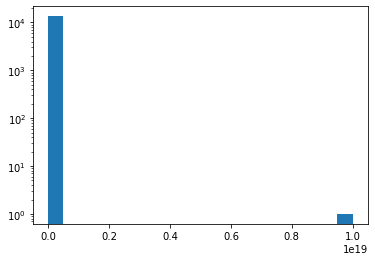

In [8]:
plt.hist(df.baseline_motorcycle1, bins=20, log=True);

In [9]:
print(df.shape[0])
df = df[df.baseline_motorcycle1 < 1e18]
df = df[df.update_motorcycle1 < 1e18]
print(df.shape[0])

13488
13486


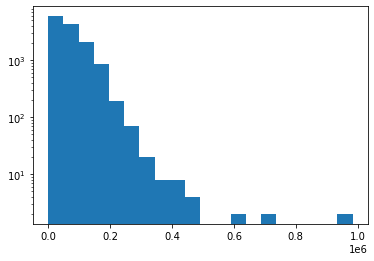

In [10]:
plt.hist(df.baseline_motorcycle1, bins=20, log=True);

In [11]:
df.describe().iloc[[1, 5]]

,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
mean,6744.49518,67345.119457,92275.012012,67326.871436,92276.41739,67657.320282,92849.408771,67827.97546,93374.279141,1.537595
50%,6744.50000,56341.500000,82382.000000,56157.000000,82056.00000,58821.000000,85645.000000,68181.00000,93387.500000,1.000000


### 4. **Discuss:** In cases where you cannot think of appropriate ways to remove outliers, would you prefer summarizing  numerical data with outliers with the mean or the median? Why?

In the case we're not able to remove outliers for some reason and had to choose between the mean and the median as our main statistics, we would pick the median. The mean is much more susceptible to outliers - as easily seen above. The median, however, remains unchanged in most cases. Hence if we want to get one average of the sample, themedian is much more robust than the mean. 

However in general we do not have any restriction on how many statistics we can show, hence we would rather use the IQR/IDR, which are another way of describing the data while still being robust to outliers. Graphical representations are useful, but unfortunately most of them are dependent on the min\max values of the sample, though there are workarounds : for instance we could use a log scale for the y-axis.

### **Task 3** — 12pts

One of the challenges with the current data is that it is not clear how to handle policies with multiple motorcycles.

1. Create three additional columns in the dataframe, `baseline_average`, `update_average`, and `diff_average`. These 
should contain, respectively, the average value for `baseline_motorcycle[1-4]` for all motorcycles insured; the average
 value for `update_motorcycle[1-4]`; and the difference between the average updated value and the average baseline 
 value.
2. **Discuss:** Propose another way of aggregating distinct motorcycles from a single policy. Point out a way in which 
this aggregation may be either better or worse than taking the average for the purpose of comparing the two scenarios in
 the study (sign at the top vs. sign at the bottom).
3. To get a sense of the impact that policies with multiple motorcycles may have in the study, let's perform some 
additional analyses. Plot the distribution of motorcycles per policy in the data. Your plot should allow for the 
meaningful comparison of the values shown.
4. In 3.1, you calculated the average kilometrage for each policy for the updated contract. Calculate the mean and the 
standard deviation of these values (which should be in the column `update_average`).
5. Another meaningful metric is the average kilometrage **per motorcycle**, not distinguishing motorcycles in different 
policies (i.e., pooled across policies). **Considering only policies with 4 motorcycles insured,** calculate the mean 
and the standard deviation of the kilometrage per motorcycle in the updated contract.
6. **Discuss:** To analyze whether signing at the top decreases dishonesty, we could consider the data in different 
ways. We could first calculate the average value per motorcycle within each policy and have one data point per policy **or** we could analyze the data at the motorcycle level and have one data point per motorcycle in the dataset. 
According to questions 3.4 and 3.5, how may this decision influence the results of the study?
---

### 1. Create three additional columns in the dataframe, `baseline_average`, `update_average`, and `diff_average`. These should contain, respectively, the average value for `baseline_motorcycle[1-4]` for all motorcycles insured; the average value for `update_motorcycle[1-4]`; and the difference between the average updated value and the average baseline value.
df.sum handles NAs well, so we just divide respective sum by the number of motorcycles in each policy

In [12]:
df['baseline_average'] = df[['baseline_motorcycle1', 'baseline_motorcycle2', 
                             'baseline_motorcycle3', 'baseline_motorcycle4']].sum(axis=1)/df['motorcycle_count']
df['update_average'] = df[['update_motorcycle1', 'update_motorcycle2', 
                             'update_motorcycle3', 'update_motorcycle4']].sum(axis=1)/df['motorcycle_count']
df['diff_average'] = df['update_average']-df['baseline_average']
df

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1,896.0,39198.0,38302.0
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2,27027.5,55558.0,28530.5
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2,33169.0,48231.0,15062.0
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1,23912.0,59136.0,35224.0
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1,16862.0,59292.0,42430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13492,Sign Top,13484,20970,61552,42391.0,46815.0,NaN,NaN,NaN,NaN,2,31680.5,54183.5,22503.0
13493,Sign Top,13485,22606,56382,NaN,NaN,NaN,NaN,467.0,27441.0,2,11536.5,41911.5,30375.0
13494,Sign Bottom,13486,30700,32916,89680.0,139570.0,NaN,NaN,NaN,NaN,2,60190.0,86243.0,26053.0
13495,Sign Top,13487,29884,35459,NaN,NaN,NaN,NaN,NaN,NaN,1,29884.0,35459.0,5575.0


### 2. Discuss: Propose another way of aggregating distinct motorcycles from a single policy. Point out a way in which this aggregation may be either better or worse than taking the average for the purpose of comparing the two scenarios in the study (sign at the top vs. sign at the bottom).

There are other ways of aggregating distinct motorcycles form a single policy:

1. Compare the sum of the baseline motorcycles kilometrage to the sum of the updated motorcycles kilometrage. On one hand, this will give more weight to policies with more motorcycles, which is logical from business point of view - they generate more money. On the other hand, people with 3 or 4 policies only take 6% of customers, and with addition of higher sums, might act as outliers and worsen our results. Also, there might be intrinsic difference between people who have 1 or 4 motorbikes, and average allows us to pool them better.

2. Finally, we could look that the average percentage change instead of average absolute change. Suppose for example that by chance one condition was given to people who tend to drive motorcycles more often and the other condition was by chance given to people who tend to drive motorcycles less often. Then, for the first condition the everage change is likely to be higher than for the second condition, but it may have nothing to do with conditions themselves, and so it does not help in comparison between the conditions. However, the percentage change is free from this problem and may be a better indicator than the simple average. 

### 3. To get a sense of the impact that policies with multiple motorcycles may have in the study, let's perform some additional analyses. Plot the distribution of motorcycles per policy in the data. Your plot should allow for the  meaningful comparison of the values shown.

Assuming we're talking about the NUMBER of motorcycles per policy.  
We plot both a bar and a pie chart to first get an absolute representation and then a relative to the total one.

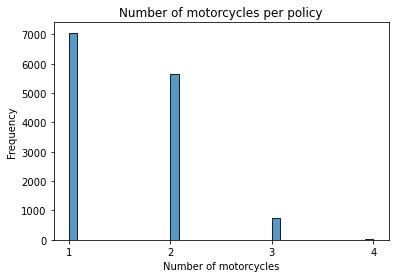

In [13]:
sns.histplot(data=df['motorcycle_count'].astype('int')).set(title='Number of motorcycles per policy', xlabel='Number of motorcycles', ylabel='Frequency', xticks=[1,2,3,4]);

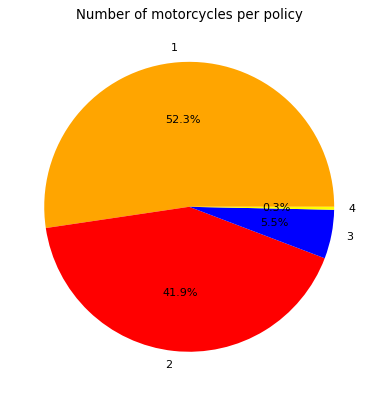

In [14]:
plt.figure(dpi=80, figsize=(9, 6))
plt.pie(df['motorcycle_count'].value_counts(), autopct='%1.1f%%',
        labels=[1, 2, 3, 4], colors=['orange', 'red', 'blue', 'yellow'])
plt.title('Number of motorcycles per policy');

### 4. In 3.1, you calculated the average kilometrage for each policy for the updated contract. Calculate the mean and the  standard deviation of these values (which should be in the column `update_average`).

In [15]:
print('Mean: ', df['update_average'].mean())

Mean:  92166.98009046413


In [16]:
print('Std: ', df['update_average'].std())

Std:  52212.86427696477


### 5. Another meaningful metric is the average kilometrage **per motorcycle**, not distinguishing motorcycles in different  policies (i.e., pooled across policies). **Considering only policies with 4 motorcycles insured,** calculate the mean and the standard deviation of the kilometrage per motorcycle in the updated contract.
We use the values we've calculated before, adjusted by constants (it should be close enough)

In [17]:
pooldf = df[df.motorcycle_count == 4]['update_motorcycle1']
pooldf = pooldf.append(df[df.motorcycle_count == 4]['update_motorcycle2'], ignore_index=True)
pooldf = pooldf.append(df[df.motorcycle_count == 4]['update_motorcycle3'], ignore_index=True)
pooldf = pooldf.append(df[df.motorcycle_count == 4]['update_motorcycle4'], ignore_index=True)

print('Mean: ', pooldf.mean())
print('Std: ', pooldf.std())

Mean:  113443.86363636363
Std:  83148.46150634854


### 6. **Discuss:** To analyze whether signing at the top decreases dishonesty, we could consider the data in different ways. We could first calculate the average value per motorcycle within each policy and have one data point per policy **or** we could analyze the data at the motorcycle level and have one data point per motorcycle in the dataset. According to questions 3.4 and 3.5, how may this decision influence the results of the study?

These two approaches both have advantages and disadvantages. 

1) Calculating the average value per motorcycle within each policy can utilize information about personal traits of each client and their psychology in termas of dishonesty, which cannot be observed from analyzing the data at the motorcycle level. 

2) However, data point per policy does not distinguish between people with one motorcycle and people with four motorcycles. This makes people with more motos less important than they could be for business. Suppose by chance one condition is given primarily to people with one motorcycle and another condition is given to people with one motorcycle. Then, if people's dishonesty is related to the number of motorcycles they possess, them we will get a biased picture when comparing policies. This can be avoided when looking at a motorcycle level. However, this is also avoidable if we include "number of motorcycles" as regressor.

About questions 3.4 and 3.5:

1) Note that in 3.5 we looked at a sample of policies with **four** motorcycles, and this sample is just 0.3% of the total number of policies, and it definitely should not be extrapolated to the whole population. Any result obtained here would likely not be applicable to all customers.

2) We see that the mean in 3.5 is much larger than in 3.4, so we can suggest that people with more motorcycles tend to have higher kilometrage per motorcycle then other customers. This is important fact to consider, as this means that taking data point per motorcycle will increase our average. 

### Task 4 — 18pts

Now that we have compressed the kilometrage reported in each contract into a single number, it is time to analyze the 
million-dollar question: *does signing at the top decrease dishonesty?*

1. Considering the updated contracts, calculate the mean and the standard deviation of the average kilometrage in a) 
policies where the signing was done at the bottom; and b) policies where the signing was done at the top. Additionally,
plot the two kilometrage distributions.
2. Determine whether the difference between the two scenarios mentioned in 1. is statistically significant.
3. **Discuss:** Recall that the assignment of the different contracts (*sign at the top* vs. *sign at the bottom*) was 
done at random. According to the results in 1. and 2., does signing at the top decrease dishonesty? 
4.  **Discuss:** Given that no intervention was performed in the baseline contract (i.e., everyone signed at the 
bottom). Would you expect any differences between the average values between *sign at the top* vs. *sign at the bottom*
 conditions for the baseline contract? Note that this is related to columns `baseline_motorcycle[1-4]`.
5. Calculate the mean and the standard deviation for the baseline contracts of the two groups (sign at the top vs. sign 
at the bottom). Additionally, plot the two kilometrage distributions.
6. Determine whether the difference between the two scenarios mentioned in 5. is statistically significant.

---

**Hint:** Recall that the column `condition` encodes the experimental condition in which the customer fell when 
reporting the values shown in columns `update_motorcycle[1-4]`!

**Hint:** To determine if the means of two sets of data are significantly different from each other, you may want to use
 the `ttest_ind` function implemented in the 
 [scipy library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). To learn more about 
 Student's t-test, check out this [Wikipedia page](https://en.wikipedia.org/wiki/Student%27s_t-test).

### 1. Considering the updated contracts, calculate the mean and the standard deviation of the average kilometrage in a)  policies where the signing was done at the bottom; and b) policies where the signing was done at the top. Additionally, plot the two kilometrage distributions.

Mean, std for the policies signed at the top:  85794.62 51704.29
Std of mean for the policies signed at the top:  625.95
Mean, std for the policies signed at the bottom:  98692.36 51928.18
Std of mean for the policies signed at the bottom:  636.16


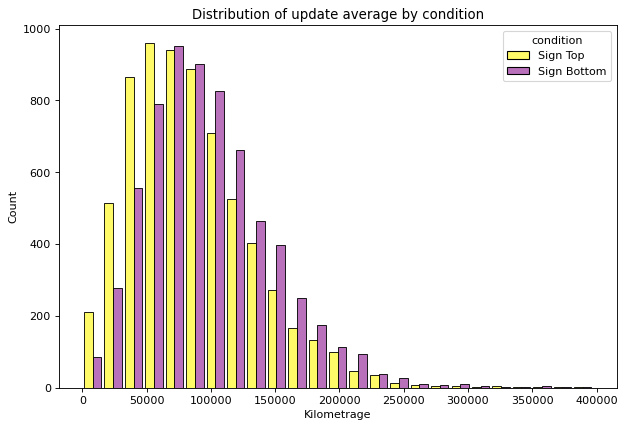

In [18]:
df_top = df[df.condition == 'Sign Top']
df_bottom = df[df.condition == 'Sign Bottom']
nt = df_top.shape[0]
nb = df_bottom.shape[0]

rr = lambda x: round(x, 2)
print('Mean, std for the policies signed at the top: ', rr(df_top['update_average'].mean()), rr(df_top['update_average'].std()))
print('Std of mean for the policies signed at the top: ', rr(df_top['update_average'].std()/nt**0.5))
print('Mean, std for the policies signed at the bottom: ', rr(df_bottom['update_average'].mean()), rr(df_bottom['update_average'].std()))
print('Std of mean for the policies signed at the bottom: ', rr(df_bottom['update_average'].std()/nb**0.5))

#cut off at 400000
plt.figure(dpi=80, figsize=(9, 6))
ax = sns.histplot(x='update_average', data=df[df['update_average'] < 4e5], bins=25,
            hue='condition', multiple='dodge', shrink=0.85, palette=['#FFF936', '#A342A6'])
plt.title('Distribution of update average by condition');
plt.xlabel('Kilometrage');

### 2. Determine whether the difference between the two scenarios mentioned in 1. is statistically significant.

Here we need to conduct a test about the difference of the two distributions. From above we see that these are not normal. However, we can still access difference between means. Sigmas are similar, so

0. H0: signing on top/bottom doesn't make difference for update_average.
1. Assume they're equal, which would be the case at H0.
2. Calculate difference in sigmas between means.
3. Approximate result with normal distribution, how likely is it under H0.
4. Reject H0 if sufficiently unlikely.

In [19]:
ut = 85791.1
ub = 98692.36
s = (625.87 + 636.16)/2

print('Sigmas between means: ', (ub-ut)/s)
print('Approx p-value: ', stats.norm.cdf(-20.445)*2)

Sigmas between means:  20.445250905287505
Approx p-value:  6.655830440805638e-93


We can see that the aprroximated probability is lower than any reasonable significance level of the test, giving us a strong evidence to reject H0. Means are not the same, and signing matters. Note, however, that signing at the **bottom has higher mean**, which means signing at the top actually **decreases** honesty.

To be real data scientists, we need to be prudent and accurate. Note that distribution is not by any means normal. Thus, assumptions above are violated. To avoid this problem, we conduct Mann Whitney U Test, which is nonparametric and hence makes no assumptions about the distribution. The test uses whole sample, and produces p-value for H0: distributions are the same.

In [20]:
res = stats.mannwhitneyu(df_top.update_average.tolist(), df_bottom.update_average.tolist(), alternative="less", method="auto")
print(res)

MannwhitneyuResult(statistic=19026110.0, pvalue=1.1370027624761015e-60)


P-value is smaller than any reasonable significnce level, so we reject the null hypothesis that the two distributions are the same. Hence, there seems to be a statistically significant difference between the two scenarios. This agrees with analysis above.

#### Conclusion: sign position matters. Signing at the top seems to decrease honesty.

### 3. **Discuss:** Recall that the assignment of the different contracts (*sign at the top* vs. *sign at the bottom*) was done at random. According to the results in 1. and 2., does signing at the top decrease dishonesty? 

We see that the average difference for the policies signed at the top is smaller than that for the policies signed at the bottom. This may suggest that signing at the top indeed decreases dishonesty. Random distribution of contracts aims at uniformly distributing them among potentially different groups, thus eliminating factors which might impact the result.

However, it also may be the case that by chance the policies signed at the top were given to people who are always more honest regardless where they would sign the contract, and by chance the policies signed at the bottom were given to people who are less honest. Then, if we just swaped the smaples, we could get the opposite result: the mean for the bottom signed policies would be lower. But note that likelyhood of such biased distribution of contracts is extremely unlikely, since our sample is quite large.

Additionally, the mean difference itself is not a direct indicator of honesty. For example, suppose all people are perfectly honest, regardless where they sign the contract. But by chance the policies signed at the top were given to people with truly lower average kilometrage, and by chance the policies signed at the bottom were given to people with truly larger average kilometrage. Then, we would see the same picture with distributions, but the conditions of signature would be irrelevant here. Again, this situation is extremely unlikely.

Lastly, sampling could not been random enough. For example, contract were given not randomly, but via some heuristic, which would result in non-uniform distributions and introduce differences.

### 4.  **Discuss:** Given that no intervention was performed in the baseline contract (i.e., everyone signed at the bottom). Would you expect any differences between the average values between *sign at the top* vs. *sign at the bottom* conditions for the baseline contract? Note that this is related to columns `baseline_motorcycle[1-4]`.
 
In general - no, we should not expect any significant differences. Our large sample decreases the chances of such differences, any specific factors different people or groups would have should be eliminated from analysis. And in limit we should get very similar samples. 

Again, without the contract intervention there still may be the difference between the average values for "sign top" and "sign bottom" groups, although with extremely small probabilities. The reasons may be the following:

1) By chance one condition was given to people who tend to be less honest, and another condition was given to people who tend to be more honest. Then we will see the difference in means: dishonest people will state artificially lower kilometrage and honest people will state the true higher kilometrage.

2) By chance one condition was given to people who tend to really have higher kilometrage, and another condition was given to people who tend to have lower kilometrage. Then we will see the difference in means, which is irrespective to the condition about signature. 

Lastly, sampling could not been random enough. For example, contract were given not randomly, but via some heuristic, which would result in non-uniform distributions and introduce differences.

### 5. Calculate the mean and the standard deviation for the baseline contracts of the two groups (sign at the top vs. sign  at the bottom). Additionally, plot the two kilometrage distributions.


Mean, std for the policies signed at the top:  59696.23 49956.32
Std of mean for the policies signed at the top:  604.79
Mean, std for the policies signed at the bottom:  75020.75 50256.59
Std of mean for the policies signed at the bottom:  615.68


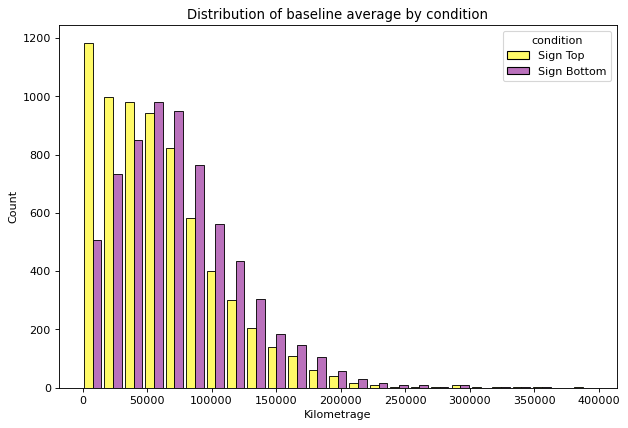

In [21]:
rr = lambda x: round(x, 2)
print('Mean, std for the policies signed at the top: ', rr(df_top['baseline_average'].mean()), rr(df_top['baseline_average'].std()))
print('Std of mean for the policies signed at the top: ', rr(df_top['baseline_average'].std()/nt**0.5))
print('Mean, std for the policies signed at the bottom: ', rr(df_bottom['baseline_average'].mean()), rr(df_bottom['baseline_average'].std()))
print('Std of mean for the policies signed at the bottom: ', rr(df_bottom['baseline_average'].std()/nb**0.5))

#cut off at 400000
plt.figure(dpi=80, figsize=(9, 6))
ax = sns.histplot(x='baseline_average', data=df[df['baseline_average'] < 4e5], bins=25,
            hue='condition', multiple='dodge', shrink=0.85, palette=['#FFF936', '#A342A6'])
plt.title('Distribution of baseline average by condition');
plt.xlabel('Kilometrage');

### 6. Determine whether the difference between the two scenarios mentioned in 5. is statistically significant.

Here we need to conduct a test about the difference of the two distributions. From above we see that these are not normal. However, we can still access difference between means. Sigmas are similar, so

0. H0: signing on top/bottom doesn't make difference for baseline contracts as well.
1. Assume they're equal, which would be the case at H0.
2. Calculate difference in sigmas between means.
3. Approximate result with normal distribution, how likely is it under H0.
4. Reject H0 if sufficiently unlikely.

In [22]:
ut = 59692.71
ub = 75020.75
s = (604.71 + 615.68)/2

print('Sigmas between means: ', (ub-ut)/s)
print('Approx p-value: ', stats.norm.cdf(-25.12)*2)

Sigmas between means:  25.11990429288998
Approx p-value:  3.0074535140783264e-139


We can see that the aprroximated probability is lower than any reasonable significance level of the test, giving us a strong evidence to reject H0. Means are not the same, and signing matters. This is unexpected result, since they should be the same with high probability.

Again, we repeat with U test

In [23]:
res = stats.mannwhitneyu(df_top.baseline_average.tolist(), df_bottom.baseline_average.tolist(), alternative="less", method="auto")
print(res)

MannwhitneyuResult(statistic=18057683.5, pvalue=2.9846551180911906e-95)


P-value is smaller than any reasonable significnce level, so we reject the null hypothesis that the two disytributions are the same. Hence, there seems to be a statistically significant difference between the two scenarios.

#### Conclusion: samples are not the same but they should be, since baseline values were obtained before the experiment started, and we supposedly split the sample 50/50. Surprising!

## Interlude: Something is dodgy about this data...

---

Noticing the oddities in the data, you send an email to your contact at the insurance company asking about the integrity
 of the data. Their reply seems like something out of a detective movie:

> Dear researcher, I believe that this data is not to be trusted. I can't talk right now but will send further hints 
>throughout the week.

As a researcher, you know that [data integrity](https://en.wikipedia.org/wiki/Data_integrity) is a big deal, and decide
 to investigate.

### Task 5 — 9pts

The first hint you receive is: *there is something off about the kilometrage values in the data.*

1. For the baseline contract and for the updated contract, plot the distribution of odometer kilometrage reported for 
the first motorcycle insured in each policy. 
2. For the first motorcycle insured by the company in each policy, plot the difference between the number of kilometers
 reported in the baseline and in the updated contract.
3. **Discuss:** why is this data unlikely to have originated from real odometer readings?

---

### 1. For the baseline contract and for the updated contract, plot the distribution of odometer kilometrage reported for the first motorcycle insured in each policy. 
  First we plot the distribution of the kilometrages with linear axes, superposing the baseline one and the updated one so it's easier to compare them visually. As we noticed there is a long tail, we decided to plot them again using a log-scale for the y-axis to get another view and thus a better global comprehension of this subset (especially on not-so-rare big values).
  
  Then in similar fashion we compare distributions for different signing conditions.

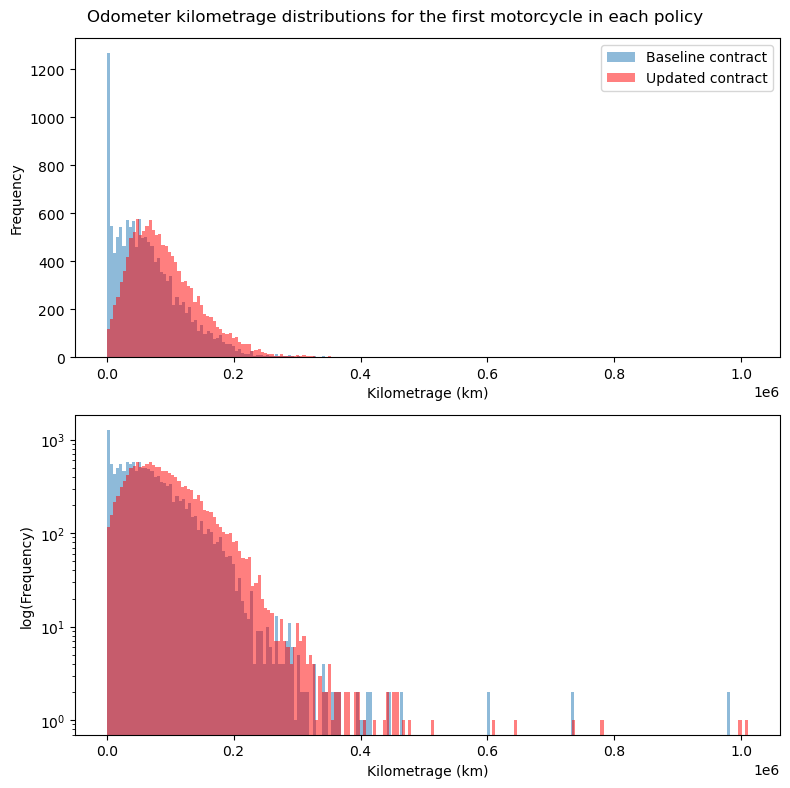

In [24]:
fig, axs = plt.subplots(2,1, dpi=100, figsize=(8, 8))
fig.suptitle('Odometer kilometrage distributions for the first motorcycle in each policy')
axs[0].set_ylabel('Frequency')
axs[1].set_ylabel('log(Frequency)')

#for every plot, the bin size has been chosen on a trial and error basis
for i in range(0,2):
    log = False if i==0 else True
    axs[i].set_xlabel('Kilometrage (km)')
    axs[i].hist(df.baseline_motorcycle1, bins=200, alpha=0.5, log=log, label='Baseline contract');
    axs[i].hist(df.update_motorcycle1, bins=200, alpha=0.5, log=log, label='Updated contract', color='r');
    
axs[0].legend(bbox_to_anchor=(1,1));
fig.tight_layout();

### Now we re-plot the distributions after separating the data based on each policy condition

In [25]:
# about 50/50
df.condition.value_counts()

Sign Top       6823
Sign Bottom    6663
Name: condition, dtype: int64

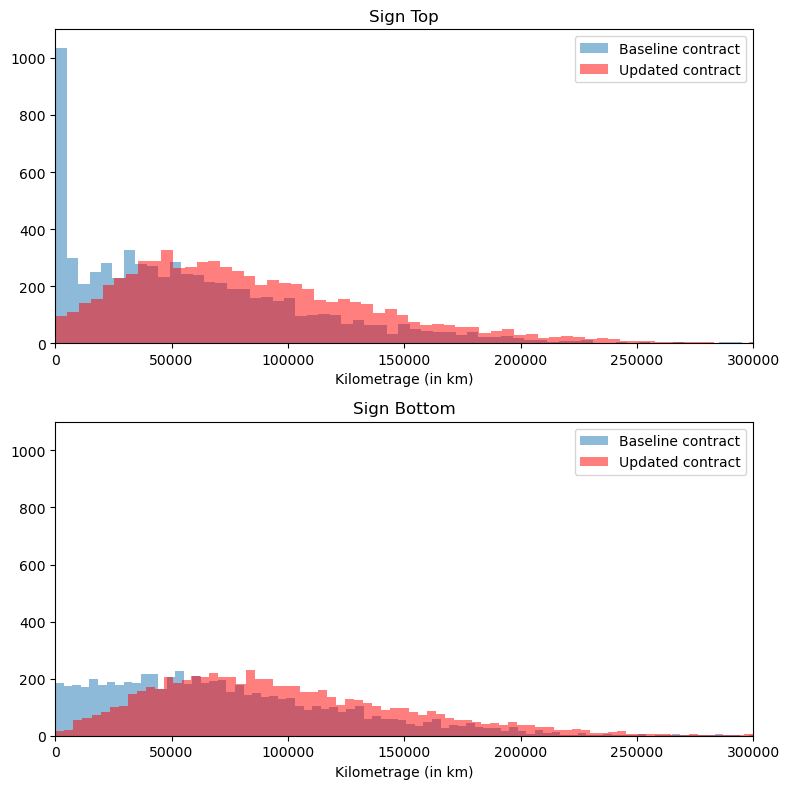

In [26]:
fig = plt.figure(dpi=100, figsize=(8, 8))

for pos, condition in enumerate(['Sign Top','Sign Bottom']):

    mask = df['condition']==condition
    ax = plt.subplot(2,1,pos+1)
    ax.hist(df[mask].baseline_motorcycle1, bins=200, alpha=0.5, label='Baseline contract')
    ax.hist(df[mask].update_motorcycle1, bins=200, color='r', alpha=0.5, label='Updated contract')
    ax.set_xlim([0, 3e5])
    ax.set_ylim([0, 1100])
    ax.set_xlabel('Kilometrage (in km)')
    ax.title.set_text(condition)
    ax.legend(loc='upper right')

fig.tight_layout()

### Note - distributions are similar, but:

1. For the sign top condition, the baseline contract has a spike around 0 (new or nearly new motos were insured), which is expected. But for sign bottom - not. Suspicious!
2. For the sign bottom condition, the first several bins of the updated contract are quite lower than for the sign top. This is suspicous as well, as this is compensating the difference between baseline and updated, given aforementioned point.

### 2. For the first motorcycle insured by the company in each policy, plot the difference between the number of kilometers reported in the baseline and in the updated contract.
  We plotted the distribution of the difference as asked. To get an even better visualisation, we plotted the Kernel Density Estimation (KDE) of the distribution as this is a good approximation of the underlying probability density function (PDF). Then, we compare these differences for different signing conditions.

In [ ]:
fig = plt.figure(dpi=100, figsize=(8, 4))

fig = sns.histplot(df.update_motorcycle1.astype(int)-df.baseline_motorcycle1.astype(int), 
                   bins=50, kde=True, alpha=0.5, linewidth=0, element='step', color='g');
fig.set(title='Difference in kilometers between baseline and updated contract \n for the first motorcycle in each policy', xlabel='Difference (in km)', ylabel='Frequency');


kde_line = mlines.Line2D([], [], color='green', label='PDF estimation')
plt.legend(handles=[kde_line], loc='best');

#### Now let's compare based on the policies condition

In [ ]:
fig = plt.figure(dpi=100, figsize=(8, 4))


for i in [1,2]:
    if i==1:
        mask = df['condition']=='Sign Top'
        title = 'Sign Top'
    else:
        mask = df['condition']=='Sign Bottom'
        title = 'Sign Bottom'
        
    ax = plt.subplot(2,1,i)
    sns.histplot(df[mask].update_motorcycle1.astype(int)-df[mask].baseline_motorcycle1.astype(int), ax=ax,
                 bins=50, alpha=0.5, linewidth=0, element='step', color='g', kde=True)
    ax.set_xlabel('Kilometrage (in km)')
    ax.title.set_text(title)
    plt.legend(handles=[kde_line], loc='best')
    
fig.tight_layout()

Notice how pdfs are skewed in different directions - for the sign bottom condition, lower values are more likely, and for top one - larger numbers are more likely.

### 3. **Discuss:** why is this data unlikely to have originated from real odometer readings?

Stars denote the importance of our findings.

1. *** For different signing options, the distribution of baseline values are not the same - peak around 0 in one, but not in other. Because the data should have originated from the same source, and assuming 50/50 sampling is followed, such differences are extremely unlikely. Here, it means that of all people who previously had 0 (or near 0) odometer ratings, only a miniscule fraction went into one sample, and all others into other sample.

2. \* For updated contracts and for the "sign bottom" condition, we see in the histogram that the first several bars are much lower, as if to compensate the lower baseline binds and make distribution of differences "about the same".

3. *** We can clearly see that absolutely no kilometrage difference between the time of the old contract and the new contract surpasses 50000 km. It looks like the values above 50000 km have all been removed of the data or truncated. In reality if the data originated from real ordometer readings we would see a tail slowly fading away and decreasing for large number kilometrage difference above 50000 km. Difference number represents the distance travelled between dates of old insurance contract and new one. Here, it looks like the difference follows a uniform distribution with a lower limit 0km and an upper limit 50000km. In reality, there is no reason why would 150 people travel 48000km, 150 people would travel 49000km, but noone would travel 51000km.

4. \* Uniform (and triangular, when you want a peak) distribution is often used in business decision making, particularly in simulations, to create a simple model for testing business solutions. Here we can see that the distribution uniform for the values 0-50000 km, and again this comes from the fact that when the most likely outcome values is known (here 0 to 50000km), then the outcome can be simulated by a uniform distribution. 

5. \* Combining the previous points, we get that "sign bottom" is likely to be simulated data, and original "sign top" data was changed (in particular - truncate differences). Points 1-4 support each other.

These points indicate that data is not real. We can thus propose a hypothesis that the data for the kilometrage were synthetized for the purpose of a business simulation and don't originate from real users.

### Task 6 — 15pts

The second hint you receive is: *there is something off with the last digits of the reported kilometrages.*

1. Considering the baseline kilometrage of the first motorcycle in each contract (`baseline_motorcycle1`), plot the 
distribution of occurrences of the last three digits. Repeat the same for the updated kilometrage of the first 
motorcycle in each contract (`update_motorcycle1`).

2. **Discuss:** What are the differences between the two distributions?

3. **Discuss:** Hypothesize a **plausible** cause for the patterns observed in the digit distribution of the baseline
 kilometrage of the first motorcycle.
    
---

**Hint:** The last two digits of the number 12314 are 314. Note that you should consider the three last digits together,
 not separately!

### 1. Considering the baseline kilometrage of the first motorcycle in each contract (`baseline_motorcycle1`), plot the distribution of occurrences of the last three digits. Repeat the same for the updated kilometrage of the first motorcycle in each contract (`update_motorcycle1`).
First we plotted the distribution of occurences of the last three digits for the baseline and updated kilometrage separately. We notice that the baseline plot seems to have clear peaks at 000, 200, 500, 600 and 800. On the other side, the updated one seems to follow a uniform distribution. Note that we used a logarithmic y-axis as it made the plot way easier to read. To help us compare them, we then plot them both on the same plot.

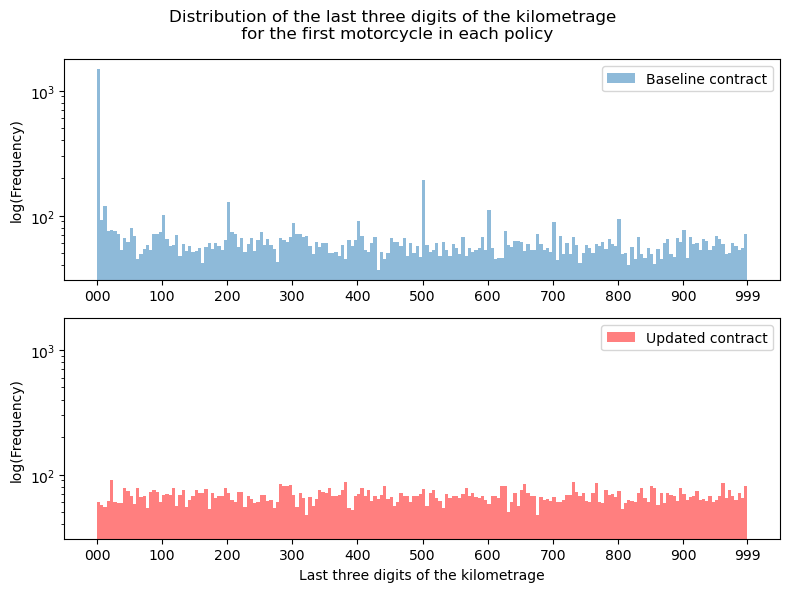

In [29]:
df['baseline_last_digits'] = df.baseline_motorcycle1.apply(lambda x: x%1000)
baseline_last_digits = df['baseline_last_digits']

df['update_last_digits'] = df.update_motorcycle1.apply(lambda x: x%1000)
update_last_digits = df['update_last_digits']

fig, axs = plt.subplots(2,1, dpi=100, figsize=(8, 6), sharey=True)
fig.suptitle('Distribution of the last three digits of the kilometrage \n for the first motorcycle in each policy')

range_plot = (0, 999)
xticks = list(range(0,1000,100))+[999]
xticks_labels = ['000']+list(range(100,1000,100))+[999]

axs[0].hist(baseline_last_digits, bins=200, alpha=0.5, label='Baseline contract', log=True)
axs[1].hist(update_last_digits, bins=200, alpha=0.5, label='Updated contract', log=True, color='r')

for i in [0,1]:
    axs[i].set_ylabel('log(Frequency)')
    axs[i].set_xticks(xticks)
    axs[i].set_xticklabels(xticks_labels)
    axs[i].legend(loc='best')


axs[1].set_xlabel('Last three digits of the kilometrage')
fig.tight_layout();

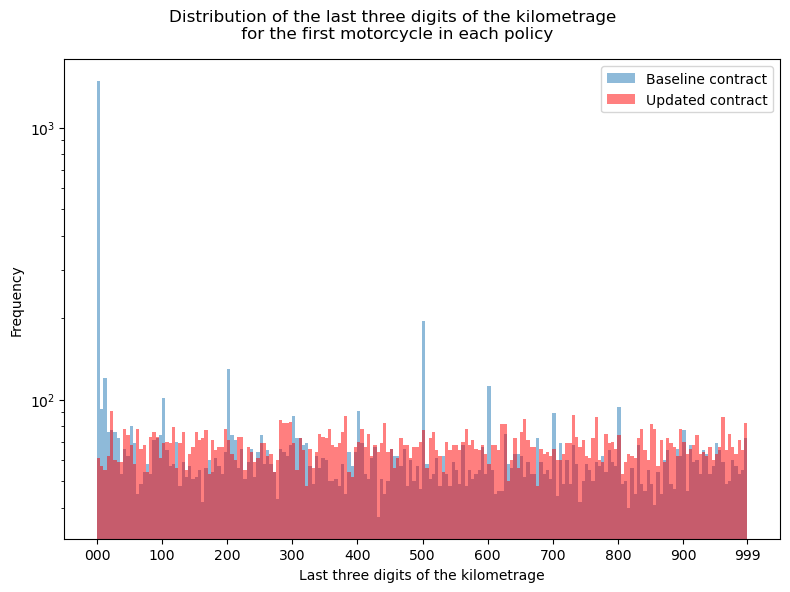

In [30]:
fig = plt.figure(dpi=100, figsize=(8, 6))
fig.suptitle('Distribution of the last three digits of the kilometrage \n for the first motorcycle in each policy')
         
plt.ylabel('Frequency')
plt.hist(baseline_last_digits, bins=200, alpha=0.5, range=range_plot, label='Baseline contract', log=True)
plt.hist(update_last_digits, bins=200, alpha=0.5, range=range_plot, label='Updated contract', color='r', log=True)
plt.xticks(xticks, xticks_labels)
plt.xlabel('Last three digits of the kilometrage')
plt.legend(loc='upper right')

fig.tight_layout()

#### Same analysis, for different conditions

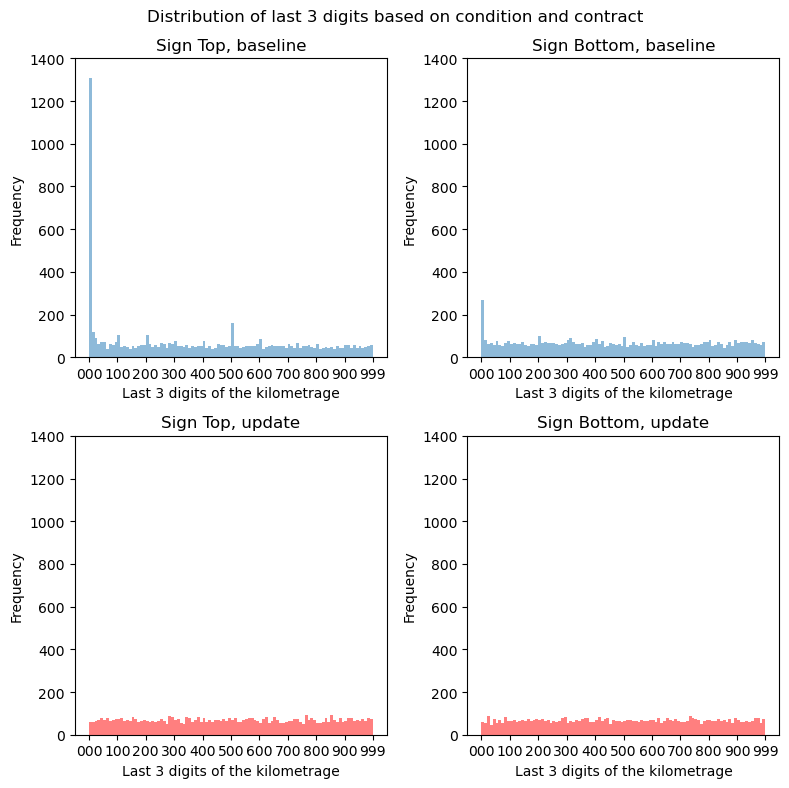

In [31]:
fig = plt.figure(dpi=100, figsize=(8, 8))
fig.suptitle("Distribution of last 3 digits based on condition and contract")
for pos, case in enumerate(product(['baseline', 'update'], ['Sign Top', 'Sign Bottom'])):
    color = 'tab:blue' if case[0] == 'baseline' else 'r'
    ax = plt.subplot(2,2,pos+1)
    mask = df['condition']==case[1]
    col = case[0] + '_last_digits'
    ax.hist(df[mask][col], bins=100, alpha=0.5, range=range_plot, color=color, label = case[0] + ' contract');
    ax.title.set_text(case[1] + ', ' + case[0])
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks_labels)
    ax.set_ylim([0, 1400]);
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Last 3 digits of the kilometrage')


fig.tight_layout()

In [32]:
df[df['condition']=='Sign Top']['baseline_last_digits'].mean()

385.54008500659535

In [33]:
df[df['condition']=='Sign Bottom']['baseline_last_digits'].mean()

483.22692480864475

#### Again, we see differences between the "baseline" distributions, even though they should be the same. Furthermore, the "update" distribution do not have any peak, which is strange.

### 2. **Discuss:** What are the differences between the two distributions?

1. We can see that the distribution in the last three digits of the kilometrage for the updated contract follows a perfectly unirform distribution where we don't see any clear peak. On the contrary for the baseline contract last three digits distribution we can clearly see a huge peak for the three digits 000 to 009 and some smaller ones for 100, 200, 400, 500, 600 and 800. So clearly for the baseline contract the distribution doesn't seem to be uniform while it seems to be the case for the updated contract.

2. There are differences between distributions of baseline contracts. First, less spikes for "sign bottom". Second, "sign bottom" mean is closer to 500, that of uniform.

### 3. **Discuss:** Hypothesize a **plausible** cause for the patterns observed in the digit distribution of the baseline kilometrage of the first motorcycle.

First and foremost, people like to round up numbers. They understand this won't impact much, and moreover, it is both easier to deal with and nicer to see "100000" than "97856". More on this [here](https://whyy.org/segments/10-50-100-why-do-we-find-comfort-in-round-numbers/). Effect is higher for "bigger" rounding - to 1000 (000) and 500, but still pronounced for hundreds (100, 200, 600...). Also, remember the initial hypothesis of the problem : "However, when individuals sign **after** lying in the form, they may not feel the need to correct the falsehoods they have reported". This might amplify the effect mentioned above, as this signing was the case for the baseline contract.

Additionally, as seen from actual kilometrage distribution, there are quite a few reported motorcycles with "0" as kilometrage - new ones. basically. This will also increase the first peak in the distribution of digits.

## Task 7 — 15pts

The third (and last) hint you receive is: *there is something wrong with the fonts.*

Your anonymous source explains that the `.tsv` file sent to you was derived from an Excel sheet. There, some of the rows
 were written in the font *Helvetica* while others were written in the font *Arial*. Your anonymous source sends you a 
 file with the relation between policy id and the font used in the respective row (`fonts.csv`), and tells you that the
  rows with *Helvetica* font were fabricated.

1. Load `fonts.csv` and merge the `font` column into your pandas dataframe.
2. Considering only the kilometrage of the first motorcycle in each policy, calculate the number of rows with the Arial 
and the Helvetica font, respectively. Also, plot the distribution of baseline kilometers for rows with the Arial font 
and for rows with the Helvetica font.
3. Similar to what was done in task 6. Plot the distribution of the last three digits for 1) the first motorcycle in 
each baseline contract (`baseline_motorcycle1`); and 2) the first motorcycle in each updated contract
 (`update_motorcycle1`).
4. **Discuss:** Why do these analyses provide evidence that the rows with Helvetica font were fabricated?

---

### 1. Load `fonts.csv` and merge the `font` column into your pandas dataframe.
Note that we do not perform any cleaning on the "fonts" dataset, mainly for two reasons : 
* in case of bad, duplicate or missing id, the merge line will take care of it as we base the merge on our main data which has been previously cleaned
* in case of incorrect font (e.g. typo, another font than Arial and Helvetica, etc...) this would be detected by the step below (7.2)

In [34]:
fonts = pd.read_csv('data/fonts.csv')
df = df.merge(fonts, how='left', on='id')
df

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average,baseline_last_digits,update_last_digits,font
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1,896.0,39198.0,38302.0,896,198,Helvetica
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2,27027.5,55558.0,28530.5,396,511,Helvetica
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2,33169.0,48231.0,15062.0,340,460,Helvetica
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1,23912.0,59136.0,35224.0,912,136,Helvetica
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1,16862.0,59292.0,42430.0,862,292,Arial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13481,Sign Top,13484,20970,61552,42391.0,46815.0,NaN,NaN,NaN,NaN,2,31680.5,54183.5,22503.0,970,552,Arial
13482,Sign Top,13485,22606,56382,NaN,NaN,NaN,NaN,467.0,27441.0,2,11536.5,41911.5,30375.0,606,382,Helvetica
13483,Sign Bottom,13486,30700,32916,89680.0,139570.0,NaN,NaN,NaN,NaN,2,60190.0,86243.0,26053.0,700,916,Helvetica
13484,Sign Top,13487,29884,35459,NaN,NaN,NaN,NaN,NaN,NaN,1,29884.0,35459.0,5575.0,884,459,Helvetica


### 2. Considering only the kilometrage of the first motorcycle in each policy, calculate the number of rows with the Arial and the Helvetica font, respectively. Also, plot the distribution of baseline kilometers for rows with the Arial font and for rows with the Helvetica font.
We plotted both the baseline kilometers distribution for both font first, and since they looked really similar, we decided to compare their estimated PDF, which we found out to coincide almost perfectly. As a follow up we decide to take a closer look.

In [35]:
df['font'].value_counts()

Arial        6744
Helvetica    6742
Name: font, dtype: int64

In [36]:
pd.crosstab(df.font, df.condition)

condition,Sign Bottom,Sign Top
font,,
Arial,3324,3420
Helvetica,3339,3403


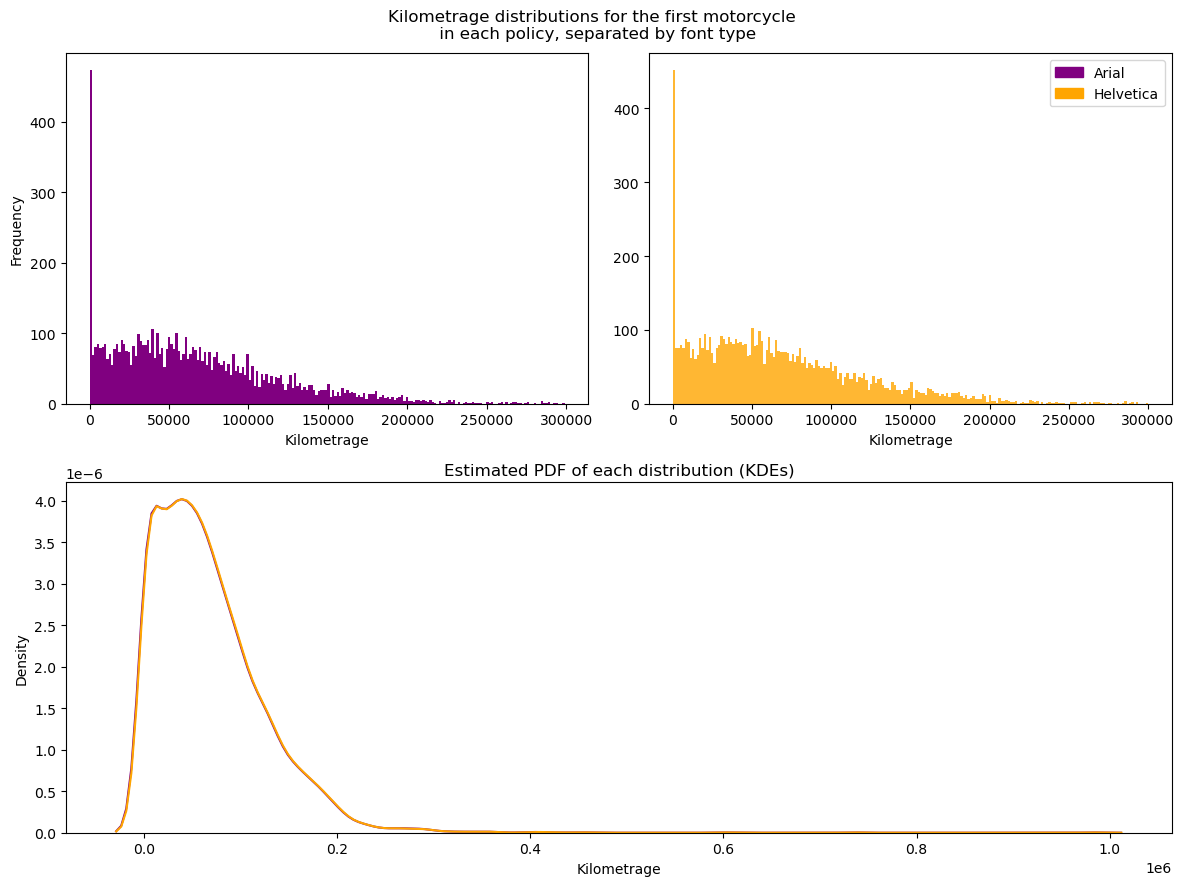

In [37]:
grouped = df[df['baseline_motorcycle1'] < 3e5].groupby('font')
orange_patch = mpatches.Patch(color='orange', label='Helvetica')
purple_patch = mpatches.Patch(color='purple', label='Arial')

fig = plt.figure(dpi=100, figsize=(12, 9))
grid = fig.add_gridspec(2,2)
axs = [fig.add_subplot(grid[0, 0]), fig.add_subplot(grid[0, 1]), fig.add_subplot(grid[1, :])]
plt.subplots_adjust(hspace=0.8, wspace=0.3)

fig.suptitle('Kilometrage distributions for the first motorcycle \n in each policy, separated by font type')
axs[2].title.set_text('Estimated PDF of each distribution (KDEs)')
axs[0].set_ylabel('Frequency')
axs[2].set_xlabel('Kilometrage', fontsize=10)
axs[1].legend(handles=[purple_patch, orange_patch], bbox_to_anchor=(1,1));

targets = zip(grouped.groups.keys(), axs)
for i, (font, ax) in enumerate(targets):
    color, alpha = ('purple',1) if font == 'Arial' else ('orange',0.8)
    ax.hist(grouped.get_group(font)['baseline_motorcycle1'], bins=200, alpha=alpha, color=color)
    ax.set_xlabel('Kilometrage', fontsize=10)

sns.kdeplot(data=df, x='baseline_motorcycle1', hue='font', hue_order=['Helvetica', 'Arial'], palette=['orange', 'purple'], ax=axs[2], legend=False);
plt.tight_layout();

#### But on a smaller scale, distributions are very different

We take a closer look at distributions at some points, which start at round numbers (connected with next point)

### Baseline kilometrage

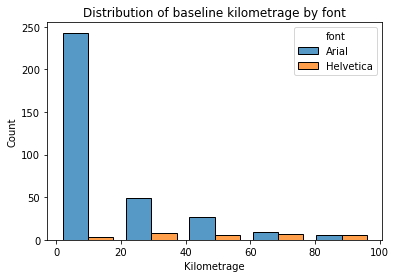

In [38]:
masked = df[df['baseline_motorcycle1'] < 100].sort_values('font')
sns.histplot(x='baseline_motorcycle1', data=masked, hue='font', multiple='dodge', shrink=0.8, bins=5);
plt.title('Distribution of baseline kilometrage by font');
plt.xlabel('Kilometrage');

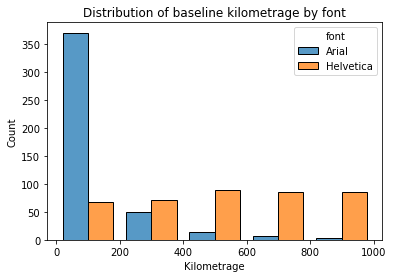

In [39]:
masked = df[df['baseline_motorcycle1'] < 1000].sort_values('font')
sns.histplot(x='baseline_motorcycle1', data=masked, hue='font', multiple='dodge', shrink=0.8, bins=5);
plt.title('Distribution of baseline kilometrage by font');
plt.xlabel('Kilometrage');

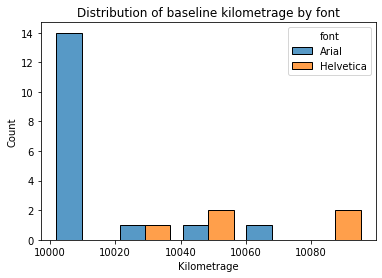

In [40]:
masked = df[(df['baseline_motorcycle1'] < 10100) & (df['baseline_motorcycle1'] >= 10000)].sort_values('font')
sns.histplot(x='baseline_motorcycle1', data=masked, hue='font', multiple='dodge', shrink=0.8, bins = 5);
plt.title('Distribution of baseline kilometrage by font');
plt.xlabel('Kilometrage');

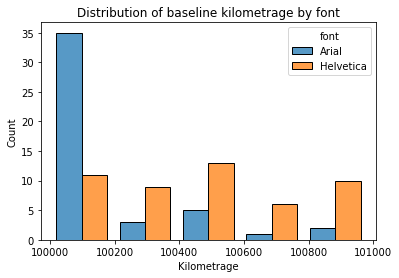

In [41]:
masked = df[(df['baseline_motorcycle1'] < 101000) & (df['baseline_motorcycle1'] >= 100000)].sort_values('font')
sns.histplot(x='baseline_motorcycle1', data=masked, hue='font', multiple='dodge', shrink=0.8, bins = 5);
plt.title('Distribution of baseline kilometrage by font');
plt.xlabel('Kilometrage');

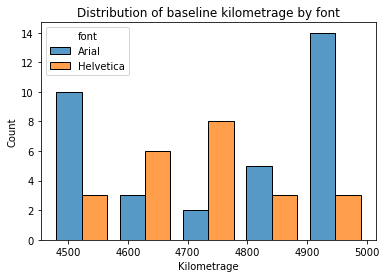

In [42]:
masked = df[(df['baseline_motorcycle1'] < 5001) & (df['baseline_motorcycle1'] >= 4444)].sort_values('font')
sns.histplot(x='baseline_motorcycle1', data=masked, hue='font', multiple='dodge', shrink=0.8, bins = 5);
plt.title('Distribution of baseline kilometrage by font');
plt.xlabel('Kilometrage');

### 3. Similar to what was done in task 6. Plot the distribution of the last three digits for 1) the first motorcycle in each baseline contract (`baseline_motorcycle1`); and 2) the first motorcycle in each updated contract (`update_motorcycle1`).
Similar to task 6, first for the baseline kilometrage and then for the updated one. In both case we added a plot where the distribution are superposed to make it easier to compare them.

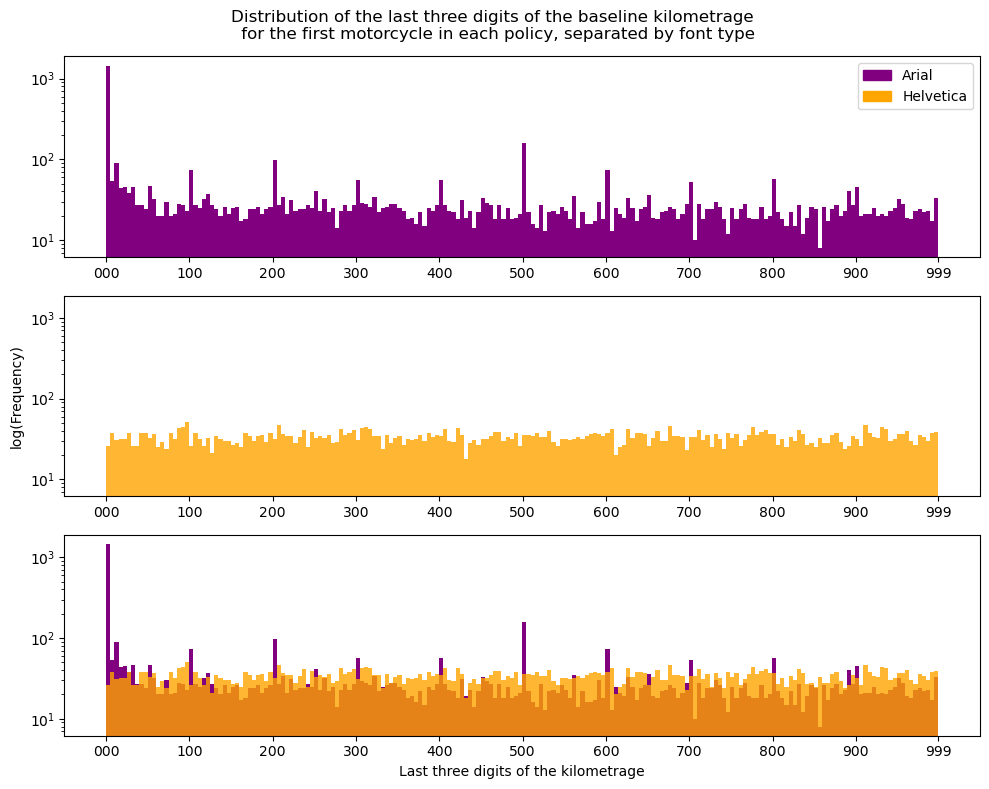

In [43]:
fig, axs = plt.subplots(3,1, dpi=100, figsize=(10, 8), sharey=True)

xticks = list(range(0,1000,100))+[999]
xticks_labels = ['000']+list(range(100,1000,100))+[999]

fig.suptitle('Distribution of the last three digits of the baseline kilometrage \n for the first motorcycle in each policy, separated by font type')
axs[2].set_xlabel('Last three digits of the kilometrage')
axs[2].set_xticks(xticks)
axs[2].set_xticklabels(xticks_labels)
axs[1].set_ylabel('log(Frequency)')
axs[0].legend(handles=[purple_patch, orange_patch], bbox_to_anchor=(1, 1))
plt.subplots_adjust(hspace=0.6)


targets = zip(grouped.groups.keys(), axs)
for i, (font, ax) in enumerate(targets):
    color, alpha = ('purple',1) if font == 'Arial' else ('orange',0.8)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks_labels)
    
    ax.hist(grouped.get_group(font)['baseline_motorcycle1'].apply(lambda x: x%1000), bins=200, log=True, alpha=alpha, color=color)
    axs[2].hist(grouped.get_group(font)['baseline_motorcycle1'].apply(lambda x: x%1000), bins=200, log=True, alpha=alpha, color=color)
    
fig.tight_layout()

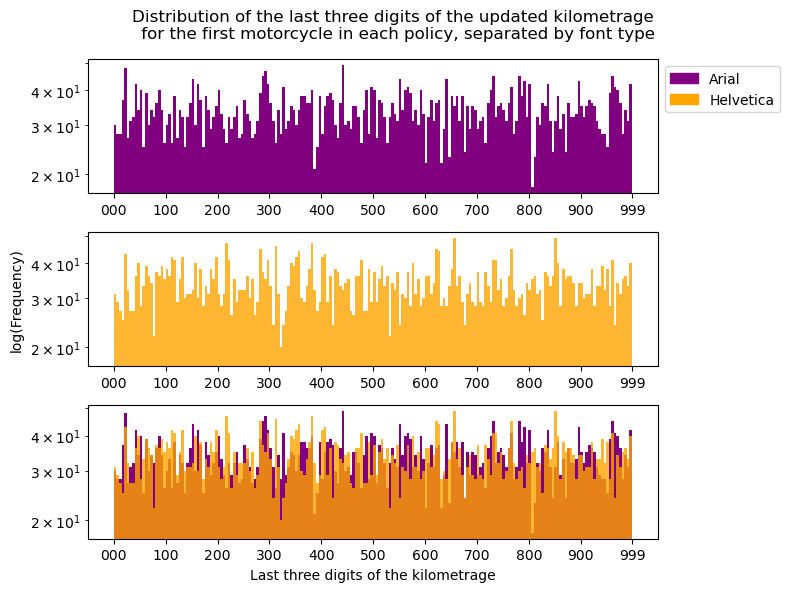

In [44]:
fig, axs = plt.subplots(3,1, dpi=100, figsize=(8, 6), sharey=True)

fig.suptitle('Distribution of the last three digits of the updated kilometrage \n for the first motorcycle in each policy, separated by font type')
axs[2].set_xlabel('Last three digits of the kilometrage')
axs[2].set_xticks(xticks)
axs[2].set_xticklabels(xticks_labels)
axs[1].set_ylabel('log(Frequency)')
axs[0].legend(handles=[purple_patch, orange_patch], bbox_to_anchor=(1,1));
plt.subplots_adjust(hspace=0.6)


targets = zip(grouped.groups.keys(), axs)
for i, (font, ax) in enumerate(targets):
    color, alpha = ('purple',1) if font == 'Arial' else ('orange',0.8)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks_labels)
    
    ax.hist(grouped.get_group(font)['update_motorcycle1'].apply(lambda x: x%1000), bins=200, log=True, alpha=alpha, color=color)
    axs[2].hist(grouped.get_group(font)['update_motorcycle1'].apply(lambda x: x%1000), bins=200, log=True, alpha=alpha, color=color)

plt.tight_layout()

### 4. **Discuss:** Why do these analyses provide evidence that the rows with Helvetica font were fabricated?

1. If we look at the distribution of the kilometrage for the Arial font and the Helvetica font alone it seems to be the same at first as we can see a huge candle for kilometrage around 0 which is logical - it represents new vehicles. However, closer look shows that distribution is similar in shape, but different small-scale wise. Particularities of data, which arise from roundings (discussed below) or new vehicles, are not represented in the Helvetica sample.

2. Then when we look at the distribution of the last 3 digits in the baseline contract. We can see a huge difference between fonts. The Helvetica font seems to make the peaks that we had observed for the rounded 3 digits (000,100,200,..900) disappear. Helvetica font has a uniform distribution for the last 3 digits of the kilometrage, which contradicts what we had seen before where people have a tendency to round up the numbers in the baseline contract. The Arial font on the contrary keeps this pattern, with peaks around values such as 500.

Our hypothesis is that kilometrage numbers with the Helvitica font were fabricated and given a distribution that resembled the one obtained with the Arial font kilometrage but this distribution didn't take into account the peaks for the last 3 digits and people's tendency to round numbers. As the kilometrage numbers are very big this would explain why when looking at the kilometrage distribution as a whole we do not see any difference between Arial and Helvetica (as a kilometrage of 48740 will be basically the same as 48700 for an insurance) but when we look at the last 3 digits, or distribution at small scale, we see the difference in the distribution between Arial and Helvetica. Helvetica distribution violates common sense of what should be there.

### Task 8 — 15pts

You've had enough! You decide to write an email to your PI (principal investigator, also known as "your boss") reporting
 the oddities you have observed in the data. Write a (brief) text (in markdown) of up to 300 words. Your text should:

- Use the analyses you did to make a convincing case that the data has been tampered with. 
- Grounded in your analyses, provide a plausible hypothesis about how the data has been tampered with.
- Discuss whether the data leads to the conclusion that signing at the top decreases dishonesty.

Structure your text into three bullets, analogous to the ones above.

You can reference images present in the notebook by indicating a task (e.g., image plotted in Task 3.3) or a cell 
number.

Note that you do not need to conduct any additional analysis to write this text. If you do, the code should be at the 
end of this notebook, i.e., after your answer.

---

**Hint:** The data has been tampered with in more than one way.


### What did we find ?
* Throughout the analysis of the data provided we have observed several incoherence’s. These give strong evidence for hypothesis that the data was compromised or synthesised. In addition to data, we also used fonts of data entries, aquired from an anonymous source. Here are our key findings: 
  * Distributions of baseline kilometrages are different for different conditions. Different means, no peaks for sign bottom at 0.
  * Distributions of baseline kilometrages are different for different fonts, easily seen at small scale.
  * For distribution of last 3 digits, there are peaks around "round numbers" such as 000 or 500, because people like to round numbers. Sign bottom have much smaller peaks than sign top for baseline, and both samples don't have any peak for updated kilometrage.
  * Data with Helvetica font does not have such peaks for digits at all.
  * Difference between updated and baseline kilometrages seems to be truncated at precisely 50000km - as otherwise it suggests no client has travelled more than 50000km, which more than odd considering some people travelled hundreds of thousands of kilometers in some cases. The difference between the old and new contract also seemed to follow an uniform distribution.  


* These facts are highly unlikely to appear in real data. This makes us suggest that some of the data was indeeed synthesised, and other part was tampered to hide this fact. This is supported by:
  * Uniform or triangular distributions are used for business modelling, when the true distribution is unknown. Like for difference of kilometrage.
  * Distributions of baseline kilometrages are very similar at large scale, but completely different at small scale. Like data with Helvetica font was synthesised.
  * At small scale, updated data still has same distribution for both fonts, unexpected if baseline have different distributions.


* After removing Helvetica data, we repeat the analysis, and still find that baseline kilometrages have different distributions:
  * Baseline distributions are still different for conditions.
  * Difference of kilometrages is still uniform and truncated.

### What is our hypothesis ?
1. All the data for the kilometrage of the updated contract was made up from a business simulation and doesn’t come from real users.
2. The data for the kilometrage in baseline contract written with Helvetica was also synthetized.
3. Data for different conditions is unlikely to be originated from same sample.

### So, does signing at the top increases honesty ?
Because the data for the updated contract was tampered, and baseline data is unlikely to be truthful as well, we cannot make any conclusion on whether or not signing at the top decreases dishonesty.

## Additionnal analysis : Analysis of the data without Helvetica

We want to further analyse data, to decide whether we can make a strong conclusion on effects of signing top/botom.

Mean, std for the policies signed at the top:  85643.09 52062.39
Std of mean for the policies signed at the top:  890.25
Mean, std for the policies signed at the bottom:  98326.42 51841.01
Std of mean for the policies signed at the bottom:  899.17


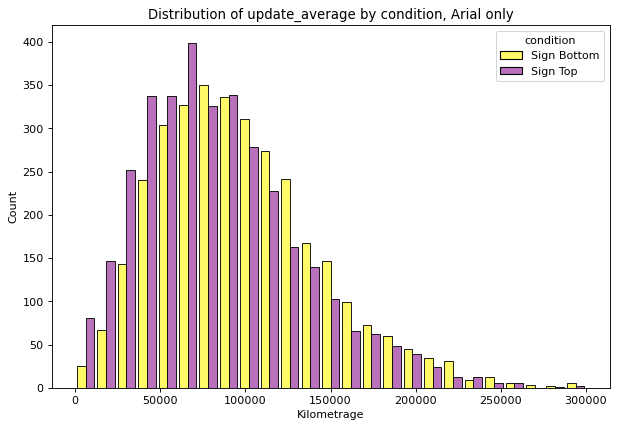

In [45]:
df_clean = df[df.font=='Arial'].copy()
col = 'baseline_average'

df_top = df_clean[df_clean.condition == 'Sign Top']
df_bottom = df_clean[df_clean.condition == 'Sign Bottom']
nt = df_top.shape[0]
nb = df_bottom.shape[0]

col = 'update_average'

rr = lambda x: round(x, 2)
print('Mean, std for the policies signed at the top: ', rr(df_top[col].mean()), rr(df_top[col].std()))
print('Std of mean for the policies signed at the top: ', rr(df_top[col].std()/nt**0.5))
print('Mean, std for the policies signed at the bottom: ', rr(df_bottom[col].mean()), rr(df_bottom[col].std()))
print('Std of mean for the policies signed at the bottom: ', rr(df_bottom[col].std()/nb**0.5))

#cut off at 400000
plt.figure(dpi=80, figsize=(9, 6))
ax = sns.histplot(x=col, data=df_clean[df_clean[col] < 3e5], bins=25,
            hue='condition', multiple='dodge', shrink=0.85, palette=['#FFF936', '#A342A6'])
plt.title(f'Distribution of {col} by condition, Arial only');
plt.xlabel('Kilometrage');

Mean, std for the policies signed at the top:  59660.71 50120.43
Std of mean for the policies signed at the top:  857.04
Mean, std for the policies signed at the bottom:  74590.02 50165.74
Std of mean for the policies signed at the bottom:  870.12


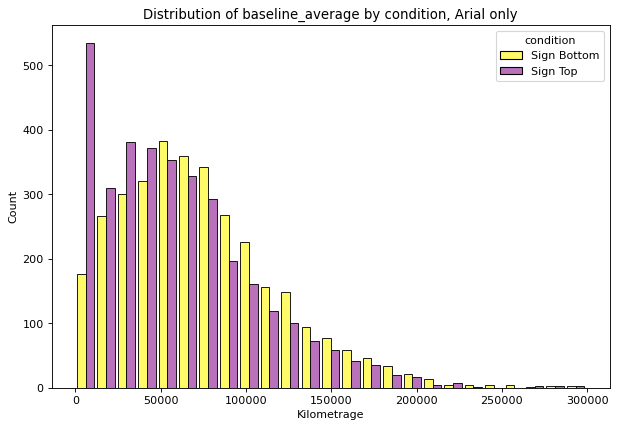

In [46]:
df_clean = df[df.font=='Arial'].copy()
col = 'baseline_average'

df_top = df_clean[df_clean.condition == 'Sign Top']
df_bottom = df_clean[df_clean.condition == 'Sign Bottom']
nt = df_top.shape[0]
nb = df_bottom.shape[0]


rr = lambda x: round(x, 2)
print('Mean, std for the policies signed at the top: ', rr(df_top[col].mean()), rr(df_top[col].std()))
print('Std of mean for the policies signed at the top: ', rr(df_top[col].std()/nt**0.5))
print('Mean, std for the policies signed at the bottom: ', rr(df_bottom[col].mean()), rr(df_bottom[col].std()))
print('Std of mean for the policies signed at the bottom: ', rr(df_bottom[col].std()/nb**0.5))

#cut off at 300000
plt.figure(dpi=80, figsize=(9, 6))
ax = sns.histplot(x=col, data=df_clean[df_clean[col] < 3e5], bins=25,
            hue='condition', multiple='dodge', shrink=0.85, palette=['#FFF936', '#A342A6'])
plt.title(f'Distribution of {col} by condition, Arial only');
plt.xlabel('Kilometrage');

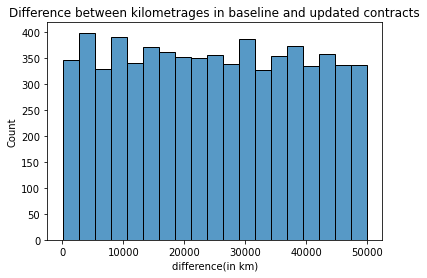

In [47]:
sns.histplot(x=df_clean['update_motorcycle1']-df_clean['baseline_motorcycle1']).set(xlabel='difference(in km)', title='Difference between kilometrages in baseline and updated contracts');

#### The data still has the same problems which were discussed before.